In [6]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from torch.nn import Module, Parameter, MSELoss
import torch.optim as optim
import torch.nn.init as init
import math

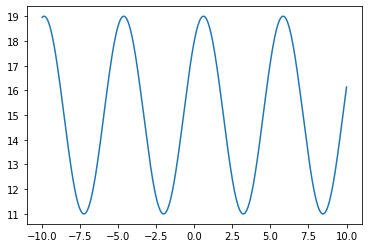

In [7]:
def true_func(x, a, b, c, d):
    return a*torch.cos(b*x + c) + d

x = torch.tensor(np.linspace(-10, 10, 1000)).float()
y = true_func(x, 4, 1.2, -7, 15).float()
plt.plot(x.numpy(), y.numpy())

In [20]:
class cosine(Module):
    def __init__(self):
        super(cosine, self).__init__()
        self.a = Parameter(torch.Tensor(1).normal_())
        self.b = Parameter(torch.Tensor(1).normal_())
        self.c = Parameter(torch.Tensor(1).normal_())
        self.d = Parameter(torch.Tensor(1).normal_())
        
    def forward(self, x):
        return self.a*torch.cos(self.b*x + self.c) + self.d

      
model = cosine()
optimizer = optim.Adam(model.parameters(), lr=0.1)
criterion = MSELoss()

In [21]:
for i in range(1000):
    optimizer.zero_grad()
    out = model(x)
    loss = criterion(out.reshape(-1, 1), y.reshape(-1, 1))
    loss.backward()
    optimizer.step()
    if i % 100 == 0:
        print(f"Epoch {i} Loss: {loss.item():.3f}")

Epoch 0 Loss: 167.566
Epoch 100 Loss: 19.375
Epoch 200 Loss: 0.732
Epoch 300 Loss: 0.007
Epoch 400 Loss: 0.000
Epoch 500 Loss: 0.000
Epoch 600 Loss: 0.000
Epoch 700 Loss: 0.000
Epoch 800 Loss: 0.000
Epoch 900 Loss: 0.013


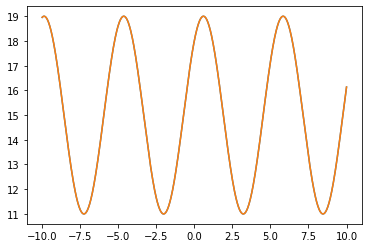

In [22]:
plt.plot(x.numpy(), model(x).detach().numpy())
plt.plot(x.numpy(), y.numpy())

In [27]:
print(model.d)

Parameter containing:
tensor([15.0000], requires_grad=True)
